**5. Por último, pero no menos importante, tenemos varios cambios de diluyente en fechas recientes. El diluyente es 
el líquido que se le añade a los espermatozoides para que sobreviva. Es un componente clave y estratégico en los 
centros de inseminación. Hay de muchos tipos, y nosotros estamos empleando 3 distintos. Estos diluyentes pueden 
tener un cierto impacto en la motilidad y calidad de movimiento, tanto de los eyaculados como de la conservación, 
así como en las contaminaciones (las que tienen que ver con las dosis, el diluyente y los eyaculados, NO las que 
tienen que ver con agua y superficies) y algunas formas anormales (totales, acrosomas, cabezas anormales, colas 
anormales). No deberían influir en ningún otro parámetro. Las fechas en las que hemos usado los diluyentes son las 
siguientes:**

DILUYENTE 1:     del 3/11/2020 al 4/12/2020 (incluidos)

                 Del 17/01/2021 al 12/02/2021 (incluidos)

DILUYENTE 2:     del 31/05/2020 al 07/07/2020 (incluidos)

                 Del 21/03/2021 a la actualidad (incluidos)

Diluyente 3:     TODO EL RESTO DE FECHAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')

In [3]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [4]:
df['FECHA_REC'].min()

Timestamp('2012-12-03 00:00:00')

In [5]:
df['FECHA_REC'].max()

Timestamp('2021-01-01 00:00:00')

In [6]:
df.shape

(153699, 32)

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

tomasconservacion = pd.read_excel('TOMAS_CONSERVACION.xlsx')

In [8]:
tomasconservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS


**Ver la influencia de los 3 diferentes tipos de diluyentes en motilidad y calidad de movimiento de EYACULADOS, motilidad y calidad de movimiento de TOMAS_CONSERVACION y formas anormales** 

**Los tres diluyentes se diferencias por fechas de aplicación. Definidos los intervalos, hay que analizar qué fechas se encuentran en qué intervalos y añadir una columna con el tipo de diluyente**

In [9]:
df['TIPO_DILUYENTE'] = ''

In [10]:
d1_min1 = datetime(2020, 11, 3)
d1_max1 = datetime(2020, 12, 4)
d1_min2 = datetime(2021, 1, 17)
d1_max2 = datetime(2021, 2, 12)

d2_min1 = datetime(2020, 5, 31)
d2_max1 = datetime(2020, 7, 7)
d2_min2 = datetime(2021, 3, 21)
d2_max2 = datetime(2021, 5, 23)

# **INFLUENCIA EN EYACULADOS**

In [11]:
df_temp = df[(df['FECHA_REC'] > d1_min1) | (df['FECHA_REC'] < d1_max1)]
df_temp.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4,
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5,
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6,
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6,


In [12]:
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d1_min1) & (df['FECHA_REC'] <= d1_max1), 'DILUYENTE_1', df['TIPO_DILUYENTE'])
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d1_min2) & (df['FECHA_REC'] <= d1_max2), 'DILUYENTE_1', df['TIPO_DILUYENTE'])

df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d2_min1) & (df['FECHA_REC'] <= d2_max1), 'DILUYENTE_2', df['TIPO_DILUYENTE'])
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d2_min2) & (df['FECHA_REC'] <= d2_max2), 'DILUYENTE_2', df['TIPO_DILUYENTE'])

df['TIPO_DILUYENTE'] = np.where(df['TIPO_DILUYENTE'] == '', 'DILUYENTE_3',df['TIPO_DILUYENTE'])

In [13]:
df['TIPO_DILUYENTE'].unique()

array(['DILUYENTE_3', 'DILUYENTE_2', 'DILUYENTE_1'], dtype=object)

In [14]:
df['TIPO_DILUYENTE'].value_counts()

DILUYENTE_3    149851
DILUYENTE_2      2230
DILUYENTE_1      1618
Name: TIPO_DILUYENTE, dtype: int64

### **ANALISIS MOTILIDAD**

In [15]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,DILUYENTE_3
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4,DILUYENTE_3
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5,DILUYENTE_3
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6,DILUYENTE_3
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6,DILUYENTE_3


In [77]:
tabla1 = df.groupby(['TIPO_DILUYENTE'])['MOTILIDAD', 'CALIDAD_MOVIMIENTO'].describe()
tabla1

MOTILIDAD                                               \
                   count      mean       std  min  25%  50%  75%  max   
TIPO_DILUYENTE                                                          
DILUYENTE_1       1618.0  8.822002  0.541840  0.0  9.0  9.0  9.0  9.0   
DILUYENTE_2       2230.0  8.775336  0.734475  0.0  9.0  9.0  9.0  9.0   
DILUYENTE_3     149851.0  8.371202  0.959093  0.0  8.0  8.0  9.0  9.0   

               CALIDAD_MOVIMIENTO                                               
                            count      mean       std  min  25%  50%  75%  max  
TIPO_DILUYENTE                                                                  
DILUYENTE_1                1618.0  7.419036  0.605016  0.0  7.0  7.0  8.0  8.0  
DILUYENTE_2                2230.0  7.349776  0.660755  0.0  7.0  7.0  8.0  9.0  
DILUYENTE_3              149851.0  7.415139  0.879058  0.0  7.0  8.0  8.0  9.0

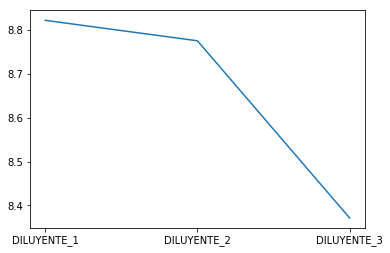

In [82]:
plt.plot(tabla1['MOTILIDAD']['mean'].index, tabla1['MOTILIDAD']['mean'].values);

In [86]:
df_aux = tabla1['MOTILIDAD']['mean']
df_aux = pd.DataFrame(df_aux)
df_aux.reset_index()

,TIPO_DILUYENTE,mean
0,DILUYENTE_1,8.822002
1,DILUYENTE_2,8.775336
2,DILUYENTE_3,8.371202


In [87]:
df_aux.to_excel('EYACULADOS-MOTILIDAD.xlsx')

### **ANALISIS CALIDAD_MOVIMIENTO**

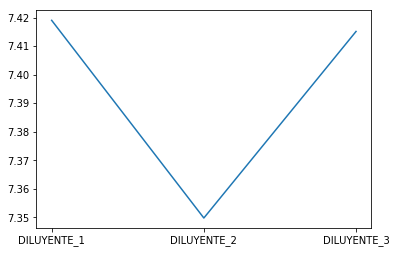

In [18]:
plt.plot(tabla1['CALIDAD_MOVIMIENTO']['mean'].index, tabla1['CALIDAD_MOVIMIENTO']['mean'].values);

In [88]:
df_aux = tabla1['CALIDAD_MOVIMIENTO']['mean']
df_aux = pd.DataFrame(df_aux)
df_aux.reset_index()

,TIPO_DILUYENTE,mean
0,DILUYENTE_1,7.419036
1,DILUYENTE_2,7.349776
2,DILUYENTE_3,7.415139


In [89]:
df_aux.to_excel('EYACULADOS-CALIDAD_MOVIMIENTO.xlsx')

### **ANALISIS FROMAS ANORMALES**

In [19]:
df_DILUYENTE1 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_1']

In [20]:
values = df_DILUYENTE1['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

1524

In [90]:
df_DILUYENTE1.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
15954,158903,2020-11-04,2737,007DP56,CAL,68,56,329,97,9,7,14,14,0.0,833.0,329,2280,True,OK,OK,True,N07DPA14503,0.0000,True,28856.0,0.0,3391.0,833.0,DUPIC,14,20.600000,7.8,DILUYENTE_1
15955,158904,2020-11-04,2285,707DP38,CAL,68,56,533,142,9,7,34,34,0.0,2289.0,533,2226,True,OK,OK,True,N07DPA14504,143.0000,True,28856.0,0.0,3392.0,2289.0,DUPIC,34,21.400000,7.9,DILUYENTE_1
15956,158905,2020-11-04,2620,007DP29,CAL,68,83,450,122,9,7,24,24,0.0,1542.0,450,2288,True,OK,OK,True,N07DPA14504,0.0000,True,28856.0,0.0,3391.0,1542.0,DUPIC,24,20.600000,7.7,DILUYENTE_1
15957,158906,2020-11-04,2734,007DP53,CAL,68,83,395,131,9,8,23,23,0.0,1514.0,395,2250,True,OK,OK,True,N07DPA14504,0.0000,True,28856.0,0.0,3392.0,1514.0,DUPIC,23,21.400000,7.9,DILUYENTE_1
15958,158907,2020-11-04,2516,920ND24,PEÑAS,68,58,543,148,9,8,36,36,0.0,2445.0,543,2232,True,OK,OK,True,N20DDA14508,130.3125,True,28856.0,0.0,3392.0,2445.0,DANBRED,36,21.299999,7.9,DILUYENTE_1


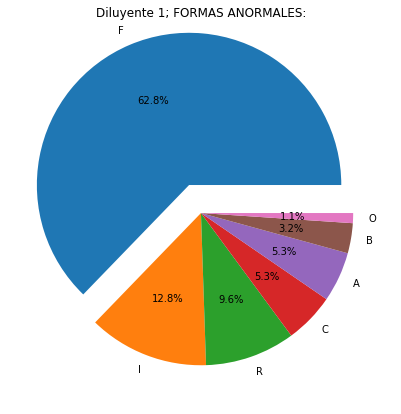

In [21]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0.2, 0, 0, 0, 0, 0, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 1; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

In [108]:
df_aux = df_DILUYENTE1.groupby(['MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['count_MD']
df_aux = df_aux.reset_index()
df_aux

,MOTIVO_DESECHO,count_MD
0,A,5
1,B,3
2,C,5
3,F,59
4,I,12
5,O,1
6,OK,1524
7,R,9


In [109]:
df_aux = df_aux.drop([6], axis=0)
df_aux

,MOTIVO_DESECHO,count_MD
0,A,5
1,B,3
2,C,5
3,F,59
4,I,12
5,O,1
7,R,9


In [110]:
df_aux.to_excel('EYACULADOS-FORMAS_ANORMALES_D1.xlsx')

In [91]:
df_DILUYENTE1.to_excel('EYACULADOS-FORMAS_ANORMALES.xlsx')

In [22]:
df_DILUYENTE2 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_2']

In [23]:
values = df_DILUYENTE2['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

2053

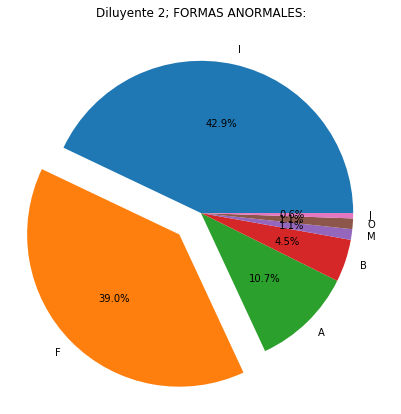

In [24]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0, 0.2, 0, 0, 0, 0, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 2; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

In [25]:
df_DILUYENTE3 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_3']

In [26]:
values = df_DILUYENTE3['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

140202

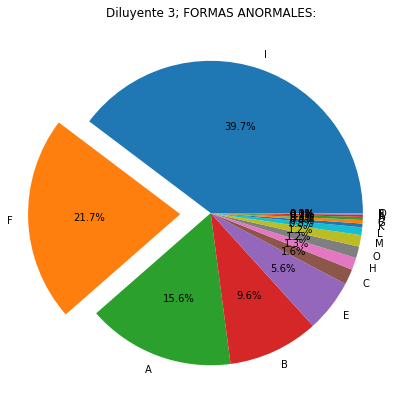

In [27]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 3; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

# **INFLUENCIA EN TOMAS_CONSERVACION**

In [28]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

conservacion = pd.read_excel('TOMAS_CONSERVACION.xlsx')

In [29]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS


In [30]:
conservacion.shape

(156578, 13)

**Me creo una columna nueva con los días de reposo junto con el diluyente de cada muestra**

In [31]:
conservacion['TIEMPO_CONSERVACION'] = conservacion['FECHA_ANALISIS'] - conservacion['FECHA_EYACULADO']

In [32]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO,TIEMPO_CONSERVACION
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS,3 days
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS,3 days
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS,3 days
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS,3 days
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS,3 days


In [33]:
conservacion['TIEMPO_CONSERVACION'].value_counts()

3 days      51115
2 days      43455
0 days      31677
4 days      15437
1 days      10945
5 days       1498
6 days        693
7 days        499
8 days        464
10 days       263
11 days       242
181 days       39
12 days        31
17 days        27
9 days         23
52 days        17
22 days        16
15 days        16
14 days        15
36 days        14
29 days        11
177 days        9
43 days         8
21 days         7
40 days         6
178 days        5
24 days         5
120 days        4
33 days         4
23 days         4
-1 days         3
116 days        3
44 days         3
37 days         3
47 days         3
30 days         3
13 days         2
20 days         2
39 days         1
26 days         1
49 days         1
35 days         1
28 days         1
16 days         1
Name: TIEMPO_CONSERVACION, dtype: int64

**Hasta un máximo de 11 días de conservación se engloban 156288 muestras de 156577, lo que supone un 99% de las muestras de conservación. Analizo lo que ocurre hasta un máximo de 11 días de conservación**

**Lo suyo sería comparar los diferentes diluyentes que hayan tenido el mismo tiempo de conservacion, asi como comparar la evolucion de la motilidad y calidad de movimiento en las diferentes fechas de analisis**

**Las fechas son las mismas y ya están definidas**

In [34]:
conservacion['TIPO_DILUYENTE'] = ''

In [35]:
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d1_min1) & (conservacion['FECHA_ANALISIS'] <= d1_max1), 'DILUYENTE_1', conservacion['TIPO_DILUYENTE'])
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d1_min2) & (conservacion['FECHA_ANALISIS'] <= d1_max2), 'DILUYENTE_1', conservacion['TIPO_DILUYENTE'])

conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d2_min1) & (conservacion['FECHA_ANALISIS'] <= d2_max1), 'DILUYENTE_2', conservacion['TIPO_DILUYENTE'])
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d2_min2) & (conservacion['FECHA_ANALISIS'] <= d2_max2), 'DILUYENTE_2', conservacion['TIPO_DILUYENTE'])

conservacion['TIPO_DILUYENTE'] = np.where(conservacion['TIPO_DILUYENTE'] == '', 'DILUYENTE_3',conservacion['TIPO_DILUYENTE'])

In [36]:
conservacion['TIPO_DILUYENTE'].value_counts()

DILUYENTE_3    152714
DILUYENTE_2      2217
DILUYENTE_1      1647
Name: TIPO_DILUYENTE, dtype: int64

**A continuación convierto el tipo TimeDelta en entero**

In [37]:
conservacion['TIEMPO_CONSERVACION'] = pd.to_numeric(conservacion['TIEMPO_CONSERVACION'].dt.days, downcast='integer')

In [38]:
conservacion['TIEMPO_CONSERVACION'][0]

3.0

**Una vez convertido, me quedo solo con las muestras cuyo tiempo de conservación ha sido igual o inferior a 11 dias**

In [39]:
conservacion = conservacion[conservacion['TIEMPO_CONSERVACION'] <= 11]

In [40]:
conservacion['TIEMPO_CONSERVACION'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  8.,  5.,  7.,  6., 10., 11.,  9., -1.])

**Elimino 3 valores que tenian como TIEMPO_CONSERVACION valores de -1**

In [41]:
conservacion = conservacion.drop(conservacion[conservacion['TIEMPO_CONSERVACION'] == -1].index)

In [42]:
conservacion['TIEMPO_CONSERVACION'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  8.,  5.,  7.,  6., 10., 11.,  9.])

In [43]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO,TIEMPO_CONSERVACION,TIPO_DILUYENTE
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS,3.0,DILUYENTE_2
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS,3.0,DILUYENTE_2
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS,3.0,DILUYENTE_2
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2


In [44]:
tablafinal = conservacion.groupby(['TIEMPO_CONSERVACION', 'TIPO_DILUYENTE'])['MOTILIDAD', 'CALIDAD_MOVIMIENTO'].describe()
tablafinal

MOTILIDAD                                \
                                       count      mean       std  min  25%   
TIEMPO_CONSERVACION TIPO_DILUYENTE                                           
0.0                 DILUYENTE_1        262.0  8.835878  0.643097  0.0  9.0   
                    DILUYENTE_2        422.0  8.905213  0.293268  8.0  9.0   
                    DILUYENTE_3      30993.0  8.366889  0.998823  0.0  8.0   
1.0                 DILUYENTE_1        225.0  8.924444  0.264875  8.0  9.0   
                    DILUYENTE_2        196.0  8.836735  0.627472  3.0  9.0   
                    DILUYENTE_3      10524.0  8.570791  0.800566  0.0  8.0   
2.0                 DILUYENTE_1        693.0  8.730159  0.721811  0.0  9.0   
                    DILUYENTE_2        802.0  8.635910  0.914364  0.0  8.0   
                    DILUYENTE_3      41960.0  8.386416  1.118672  0.0  8.0   
3.0                 DILUYENTE_1        462.0  8.926407  0.340657  4.0  9.0   
                    DILUYENTE_2        796.0  8.790201  0.558484  1.0  9.0   
                    DILUYENTE_3      49857.0  8.377620  0.859557  0.0  8.0   
4.0                 DILUYENTE_1          3.0  8.666667  0.577350  8.0  8.5   
                    DILUYENTE_2          1.0  8.000000       NaN  8.0  8.0   
                    DILUYENTE_3      15433.0  8.223936  0.757889  0.0  8.0   
5.0                 DILUYENTE_1          2.0  8.000000  0.000000  8.0  8.0   
                    DILUYENTE_3       1496.0  7.944519  1.433100  0.0  8.0   
6.0                 DILUYENTE_3        693.0  8.232323  1.254815  0.0  8.0   
7.0                 DILUYENTE_3        499.0  7.981964  1.204774  0.0  8.0   
8.0                 DILUYENTE_3        464.0  8.278017  0.897724  0.0  8.0   
9.0                 DILUYENTE_3         23.0  8.000000  0.738549  6.0  8.0   
10.0                DILUYENTE_3        263.0  8.296578  0.897126  2.0  8.0   
11.0                DILUYENTE_3        242.0  8.169421  0.849832  1.0  8.0   

                                                  CALIDAD_MOVIMIENTO  \
                                    50%  75%  max              count   
TIEMPO_CONSERVACION TIPO_DILUYENTE                                     
0.0                 DILUYENTE_1     9.0  9.0  9.0              262.0   
                    DILUYENTE_2     9.0  9.0  9.0              422.0   
                    DILUYENTE_3     8.0  9.0  9.0            30993.0   
1.0                 DILUYENTE_1     9.0  9.0  9.0              225.0   
                    DILUYENTE_2     9.0  9.0  9.0              196.0   
                    DILUYENTE_3     9.0  9.0  9.0            10524.0   
2.0                 DILUYENTE_1     9.0  9.0  9.0              693.0   
                    DILUYENTE_2     9.0  9.0  9.0              802.0   
                    DILUYENTE_3     9.0  9.0  9.0            41960.0   
3.0                 DILUYENTE_1     9.0  9.0  9.0              462.0   
                    DILUYENTE_2     9.0  9.0  9.0              796.0   
                    DILUYENTE_3     8.0  9.0  9.0            49857.0   
4.0                 DILUYENTE_1     9.0  9.0  9.0                3.0   
                    DILUYENTE_2     8.0  8.0  8.0                1.0   
                    DILUYENTE_3     8.0  9.0  9.0            15433.0   
5.0                 DILUYENTE_1     8.0  8.0  8.0                2.0   
                    DILUYENTE_3     8.0  9.0  9.0             1496.0   
6.0                 DILUYENTE_3     8.0  9.0  9.0              693.0   
7.0                 DILUYENTE_3     8.0  9.0  9.0              499.0   
8.0                 DILUYENTE_3     8.0  9.0  9.0              464.0   
9.0                 DILUYENTE_3     8.0  8.0  9.0               23.0   
10.0                DILUYENTE_3     8.0  9.0  9.0              263.0   
11.0                DILUYENTE_3     8.0  9.0  9.0              242.0   

                                                                            \
                                        mean       std 

**Analizo solo las muestras desde 0 hasta 6 días de conservación ya que, a partir de 7 días, solo es el DILUYENTE_3 el que aparece**

### **ANALISIS MOTILIDAD**

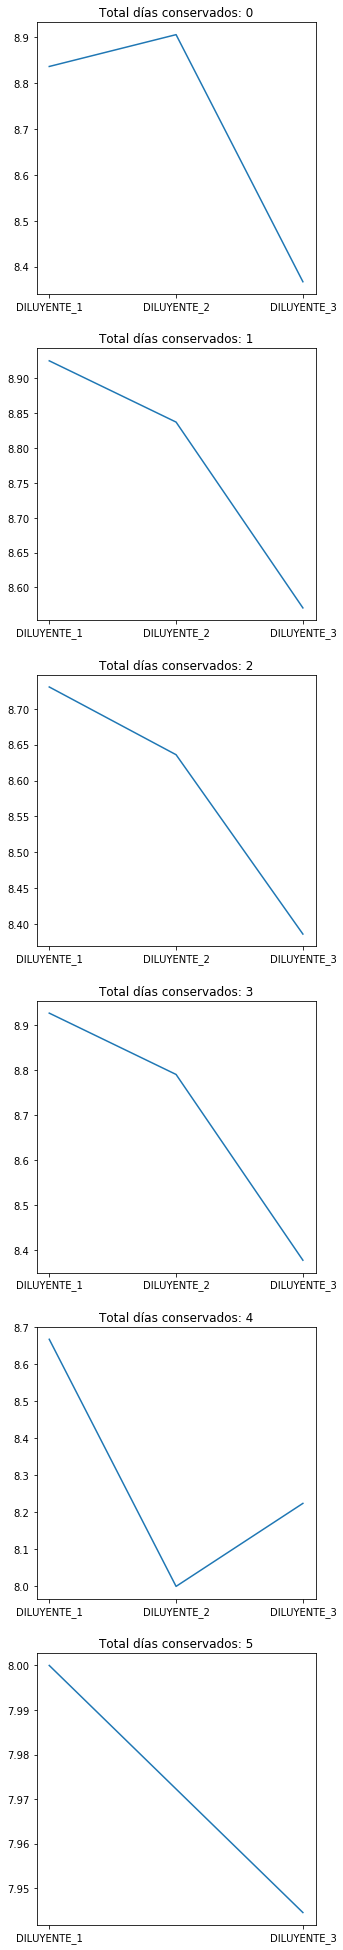

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

In [45]:
fig, ax = plt.subplots(6, 1)
for i in range(6):
    fig1 = plt.figure(i)
    ax[i].plot(tablafinal.loc[i]['MOTILIDAD']['mean'].index, tablafinal.loc[i]['MOTILIDAD']['mean'].values);
    ax[i].set_title("Total días conservados: " + str(i))
    fig1.set_size_inches(5,35)

In [46]:
for i in range(6):
    print('El Diluyente que más media tiene en cuanto a MOTILIDAD y con ' + str(i) + ' días de conservacion es ' + str(tablafinal.loc[i]['MOTILIDAD']['mean'].sort_values(ascending = False).index[0]))

El Diluyente que más media tiene en cuanto a MOTILIDAD y con 0 días de conservacion es DILUYENTE_2
El Diluyente que más media tiene en cuanto a MOTILIDAD y con 1 días de conservacion es DILUYENTE_1
El Diluyente que más media tiene en cuanto a MOTILIDAD y con 2 días de conservacion es DILUYENTE_1
El Diluyente que más media tiene en cuanto a MOTILIDAD y con 3 días de conservacion es DILUYENTE_1
El Diluyente que más media tiene en cuanto a MOTILIDAD y con 4 días de conservacion es DILUYENTE_1
El Diluyente que más media tiene en cuanto a MOTILIDAD y con 5 días de conservacion es DILUYENTE_1


**El diluyente 1 es el que mas MOTILIDAD presenta si conservas la muestra de 1 a 5 días**

### **ANALISIS CALIDAD MOVIMIENTO**

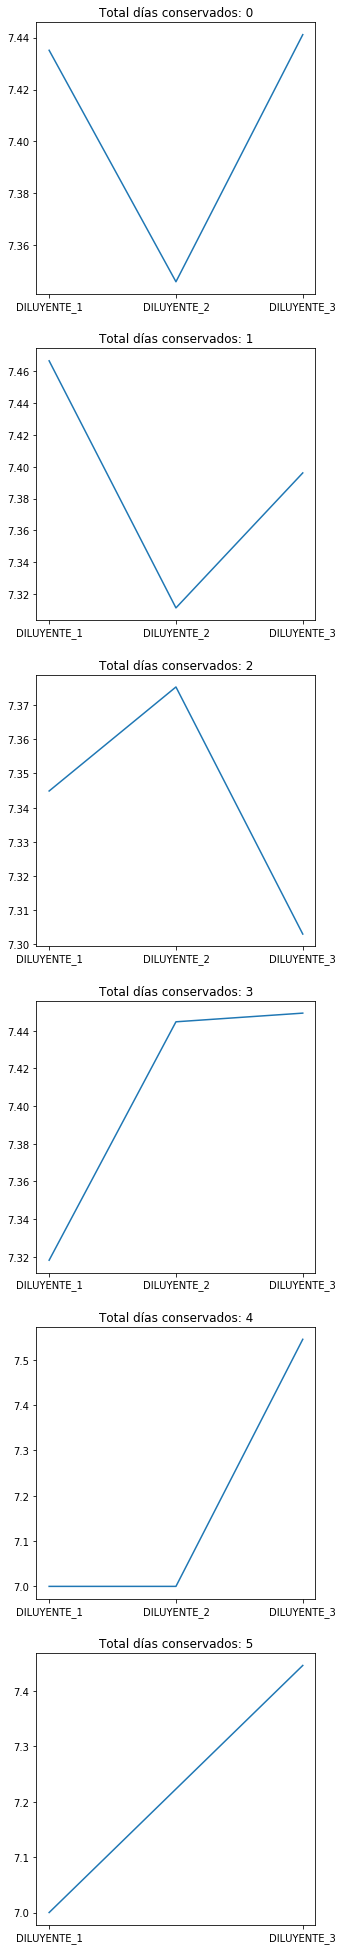

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

<Figure size 360x2520 with 0 Axes>

In [47]:
fig, ax = plt.subplots(6, 1)
for i in range(6):
    fig1 = plt.figure(i)
    ax[i].plot(tablafinal.loc[i]['CALIDAD_MOVIMIENTO']['mean'].index, tablafinal.loc[i]['CALIDAD_MOVIMIENTO']['mean'].values);
    ax[i].set_title("Total días conservados: " + str(i))
    fig1.set_size_inches(5,35)

In [48]:
for i in range(6):
    print('El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con ' + str(i) + ' días de conservacion es ' + str(tablafinal.loc[i]['CALIDAD_MOVIMIENTO']['mean'].sort_values(ascending = False).index[0]))

El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 0 días de conservacion es DILUYENTE_3
El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 1 días de conservacion es DILUYENTE_1
El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 2 días de conservacion es DILUYENTE_2
El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 3 días de conservacion es DILUYENTE_3
El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 4 días de conservacion es DILUYENTE_3
El Diluyente que más media tiene en cuanto a CALIDAD_MOVIMIENTO y con 5 días de conservacion es DILUYENTE_3


**El diluyente 3 es el que más CALIDAD_MOVIMIENTO presenta si conservas la muestra 0, 3, 4 o 5 días**

### **ANALISIS FORMAS ANORMALES**

**Podemos unir cada muestra de la base de datos de TOMAS_CONSERVACION con ella misma en la base de datos EYACULADOS mediante el NUM_ANALISIS y CODIGO, en respectibas bases de datos**

In [49]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO,TIEMPO_CONSERVACION,TIPO_DILUYENTE
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS,3.0,DILUYENTE_2
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS,3.0,DILUYENTE_2
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS,3.0,DILUYENTE_2
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2


In [50]:
A = conservacion.loc[:, ['NUM_ANALISIS', 'TIPO_DILUYENTE', 'TIEMPO_CONSERVACION']]
B = df.loc[:, ['CODIGO', 'MOTIVO_DESECHO']]

In [51]:
merged = A.merge(B, left_on='NUM_ANALISIS', right_on='CODIGO')
merged.head()

,NUM_ANALISIS,TIPO_DILUYENTE,TIEMPO_CONSERVACION,CODIGO,MOTIVO_DESECHO
0,150111,DILUYENTE_2,3.0,150111,OK
1,150112,DILUYENTE_2,3.0,150112,OK
2,150113,DILUYENTE_2,3.0,150113,OK
3,150114,DILUYENTE_2,3.0,150114,OK
4,150115,DILUYENTE_2,3.0,150115,OK


In [52]:
merged.shape

(156828, 5)

In [53]:
valores = merged['TIPO_DILUYENTE'].value_counts().sort_values()
valores

DILUYENTE_1      1646
DILUYENTE_2      2216
DILUYENTE_3    152966
Name: TIPO_DILUYENTE, dtype: int64

In [54]:
merged['MOTIVO_DESECHO'].unique()

array(['OK', 'I', 'A', 'F', 'H', 'E', 'B', 'O', 'L', 'M', 'C', nan, 'D',
       'K', 'G', 'J', 'P', 'Q', 'R'], dtype=object)

In [55]:
merged = merged[merged['MOTIVO_DESECHO'] == 'F']

In [56]:
merged['MOTIVO_DESECHO'].unique()

array(['F'], dtype=object)

In [57]:
merged = merged.groupby(['TIEMPO_CONSERVACION', 'TIPO_DILUYENTE'])['MOTIVO_DESECHO'].count()
merged = pd.DataFrame(merged)
merged

MOTIVO_DESECHO
TIEMPO_CONSERVACION TIPO_DILUYENTE                
0.0                 DILUYENTE_1                  3
                    DILUYENTE_3                166
1.0                 DILUYENTE_1                 18
                    DILUYENTE_2                 27
                    DILUYENTE_3                440
2.0                 DILUYENTE_1                 11
                    DILUYENTE_2                 36
                    DILUYENTE_3                671
3.0                 DILUYENTE_1                 23
                    DILUYENTE_2                  4
                    DILUYENTE_3                590
4.0                 DILUYENTE_3                210
5.0                 DILUYENTE_3                  9
6.0                 DILUYENTE_3                  2

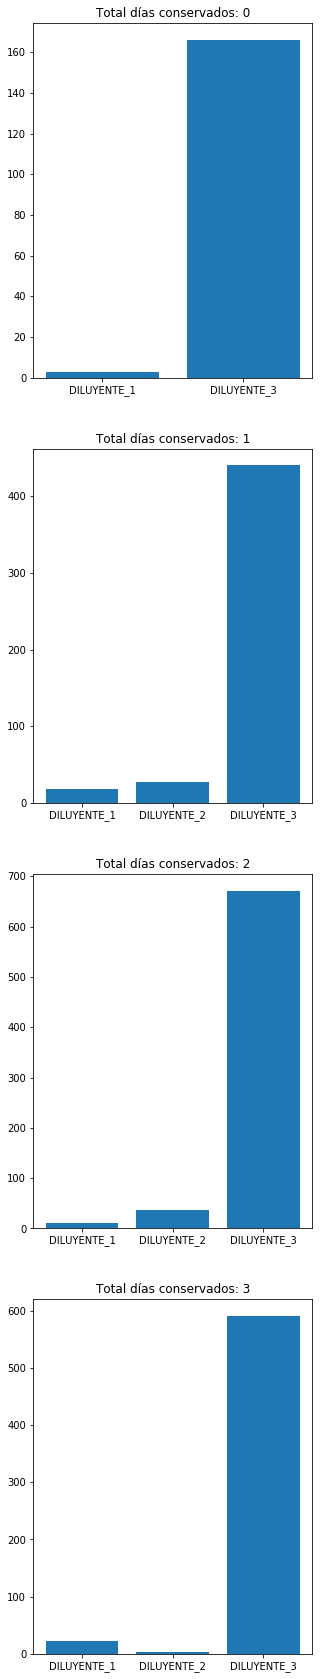

<Figure size 360x2160 with 0 Axes>

<Figure size 360x2160 with 0 Axes>

<Figure size 360x2160 with 0 Axes>

In [58]:
fig, ax = plt.subplots(4, 1)
for i in range(4):
    fig1 = plt.figure(i)
    ax[i].bar(merged.loc[i]['MOTIVO_DESECHO'].index, merged.loc[i]['MOTIVO_DESECHO'].values);
    ax[i].set_title("Total días conservados: " + str(i))
    fig1.set_size_inches(5,30)

**El diluyente 3 es el que más formas anormales presenta en todos los diferentes tiempos de conservación existentes**

In [59]:
merged = merged.reset_index()

In [60]:
merged.head()

,TIEMPO_CONSERVACION,TIPO_DILUYENTE,MOTIVO_DESECHO
0,0.0,DILUYENTE_1,3
1,0.0,DILUYENTE_3,166
2,1.0,DILUYENTE_1,18
3,1.0,DILUYENTE_2,27
4,1.0,DILUYENTE_3,440


In [61]:
merged['MOTIVO_DESECHO']

0       3
1     166
2      18
3      27
4     440
5      11
6      36
7     671
8      23
9       4
10    590
11    210
12      9
13      2
Name: MOTIVO_DESECHO, dtype: int64

In [62]:
merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'] = ''

In [63]:
merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'] = np.where(merged['TIPO_DILUYENTE'] == 'DILUYENTE_1', merged['MOTIVO_DESECHO']/valores[0], merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'])

merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'] = np.where(merged['TIPO_DILUYENTE'] == 'DILUYENTE_2', merged['MOTIVO_DESECHO']/valores[1], merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'])

merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'] = np.where(merged['TIPO_DILUYENTE'] == 'DILUYENTE_3', merged['MOTIVO_DESECHO']/valores[2], merged['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'])

In [64]:
merged

,TIEMPO_CONSERVACION,TIPO_DILUYENTE,MOTIVO_DESECHO,FORMAS_ANORMALES/FRECUENCIA_DILUYENTE
0,0.0,DILUYENTE_1,3,0.0018226
1,0.0,DILUYENTE_3,166,0.00108521
2,1.0,DILUYENTE_1,18,0.0109356
3,1.0,DILUYENTE_2,27,0.0121841
4,1.0,DILUYENTE_3,440,0.00287646
5,2.0,DILUYENTE_1,11,0.00668287
6,2.0,DILUYENTE_2,36,0.0162455
7,2.0,DILUYENTE_3,671,0.0043866
8,3.0,DILUYENTE_1,23,0.0139733
9,3.0,DILUYENTE_2,4,0.00180505


In [65]:
merged = merged.groupby(['TIEMPO_CONSERVACION', 'TIPO_DILUYENTE'])['FORMAS_ANORMALES/FRECUENCIA_DILUYENTE'].describe()

In [66]:
merged

count  unique       top  freq
TIEMPO_CONSERVACION TIPO_DILUYENTE                               
0.0                 DILUYENTE_1       1.0     1.0  0.001823   1.0
                    DILUYENTE_3       1.0     1.0  0.001085   1.0
1.0                 DILUYENTE_1       1.0     1.0  0.010936   1.0
                    DILUYENTE_2       1.0     1.0  0.012184   1.0
                    DILUYENTE_3       1.0     1.0  0.002876   1.0
2.0                 DILUYENTE_1       1.0     1.0  0.006683   1.0
                    DILUYENTE_2       1.0     1.0  0.016245   1.0
                    DILUYENTE_3       1.0     1.0  0.004387   1.0
3.0                 DILUYENTE_1       1.0     1.0  0.013973   1.0
                    DILUYENTE_2       1.0     1.0  0.001805   1.0
                    DILUYENTE_3       1.0     1.0  0.003857   1.0
4.0                 DILUYENTE_3       1.0     1.0  0.001373   1.0
5.0                 DILUYENTE_3       1.0     1.0  0.000059   1.0
6.0                 DILUYENTE_3       1.0     1.0  0.000013   1.0

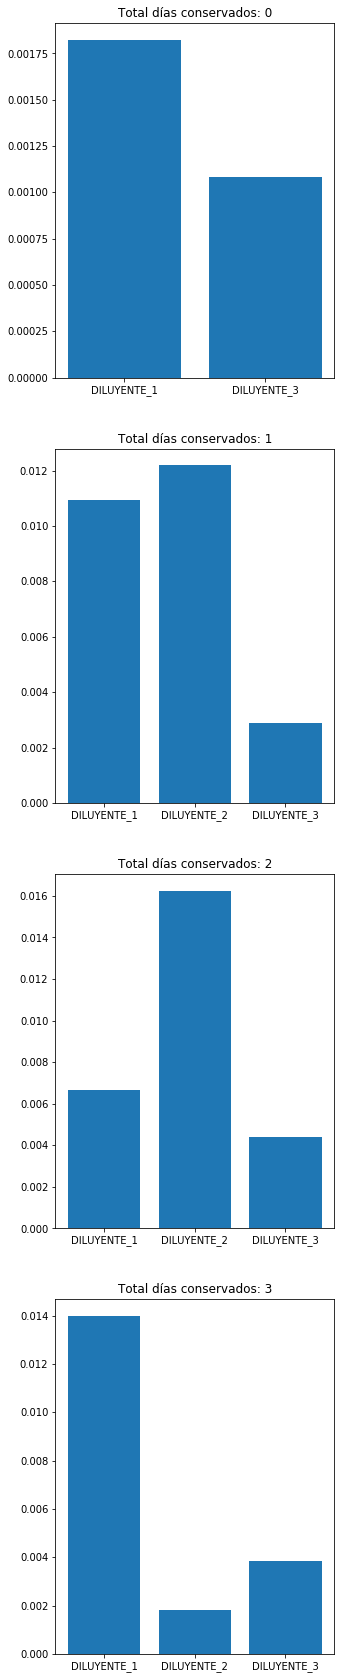

<Figure size 360x2160 with 0 Axes>

<Figure size 360x2160 with 0 Axes>

<Figure size 360x2160 with 0 Axes>

In [67]:
fig, ax = plt.subplots(4, 1)
for i in range(4):
    fig1 = plt.figure(i)
    ax[i].bar(merged.loc[i]['top'].index, merged.loc[i]['top'].values);
    ax[i].set_title("Total días conservados: " + str(i))
    fig1.set_size_inches(5,30)